 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [40]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [57]:
# Reading whale returns
whale_returns = pd.read_csv('whale_returns.csv', index_col='Date', parse_dates=True)

In [58]:
# Count nulls
whale_returns.isnull().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [59]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [60]:
# Reading algorithmic returns
algo_returns = pd.read_csv('algo_returns.csv', index_col='Date', parse_dates=True)


In [61]:
# Count nulls
algo_returns.isnull().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [62]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [63]:
# Reading S&P 500 Closing Prices
sp500_history = pd.read_csv('sp500_history.csv', index_col='Date', parse_dates=True)

/var/folders/sg/ppzpg3hd4rqdrj7bn5vn4j5c0000gp/T/ipykernel_40122/463325402.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_history = pd.read_csv('sp500_history.csv', index_col='Date', parse_dates=True)


In [64]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [65]:
# Fix Data Types
sp500_history['Close'] = pd.to_numeric(sp500_history['Close'].str.replace('$', '').str.replace(',', ''), errors='coerce')


In [66]:
# Calculate Daily Returns
sp500_history = sp500_history.sort_index()
sp500_history['Daily Returns'] = sp500_history['Close'].pct_change()
sp500_returns = sp500_history[['Daily Returns']]

In [67]:
# Drop nulls
sp500_returns.dropna(inplace=True)

/var/folders/sg/ppzpg3hd4rqdrj7bn5vn4j5c0000gp/T/ipykernel_40122/2365554483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_returns.dropna(inplace=True)


In [68]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename(columns={'Daily Returns': 'S&P 500'}, inplace=True)

/var/folders/sg/ppzpg3hd4rqdrj7bn5vn4j5c0000gp/T/ipykernel_40122/3398655179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_returns.rename(columns={'Daily Returns': 'S&P 500'}, inplace=True)


## Combine Whale, Algorithmic, and S&P 500 Returns

In [69]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, sp500_returns], axis=1)
combined_df.dropna(inplace=True)

---

## Performance Anlysis

#### Calculate and Plot the daily returns.

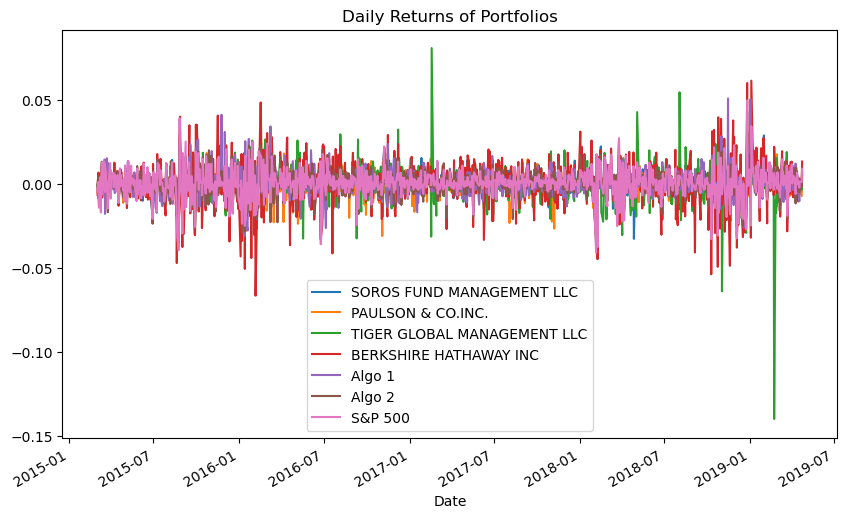

In [71]:
# Plot daily returns of all portfolios
combined_df.plot.(title='Daily Returns of Portfolios', figsize=(10, 6))
plt.show()


#### Calculate and Plot cumulative returns.

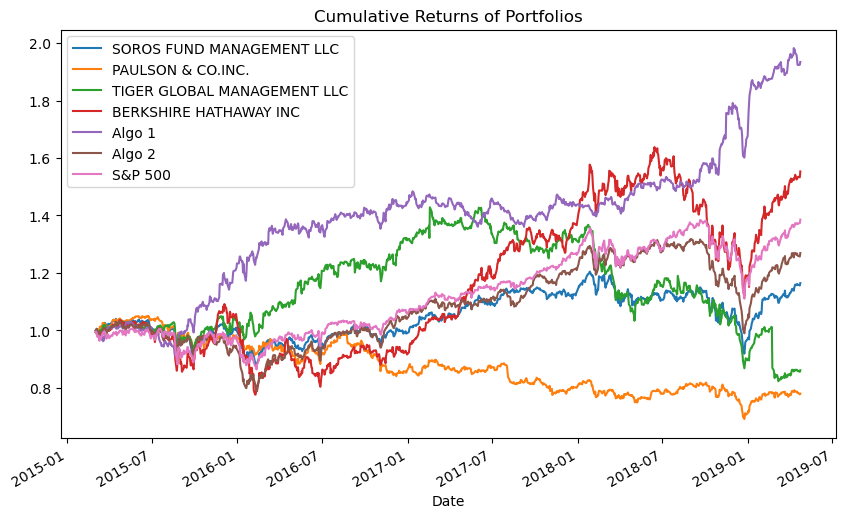

In [72]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(title='Cumulative Returns of Portfolios', figsize=(10, 6))
plt.show()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


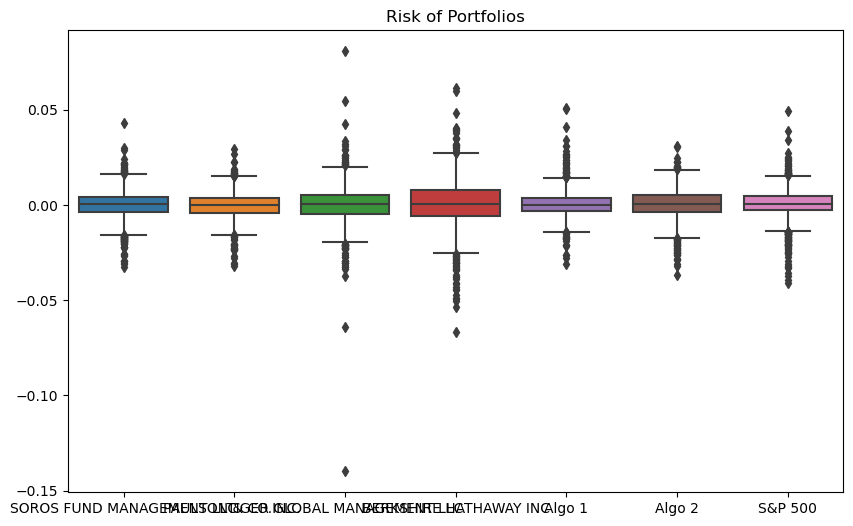

In [73]:
# Box plot to visually show risk
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df)
plt.title('Risk of Portfolios')
plt.show()

### Calculate Standard Deviations

In [74]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()


### Determine which portfolios are riskier than the S&P 500

In [77]:
# Calculate  the daily standard deviation of S&P 500
annualized_std = daily_std * np.sqrt(252)
#print("Annualized Standard Deviation:\n", annualized_std)

# Determine which portfolios are riskier than the S&P 500
riskier_than_sp500 = daily_std > daily_std['S&P 500']
print("Portfolios Riskier than S&P 500:\n", riskier_than_sp500)

Portfolios Riskier than S&P 500:
 SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool


### Calculate the Annualized Standard Deviation

In [78]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
print("Annualized Standard Deviation:\n", annualized_std)

Annualized Standard Deviation:
 SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

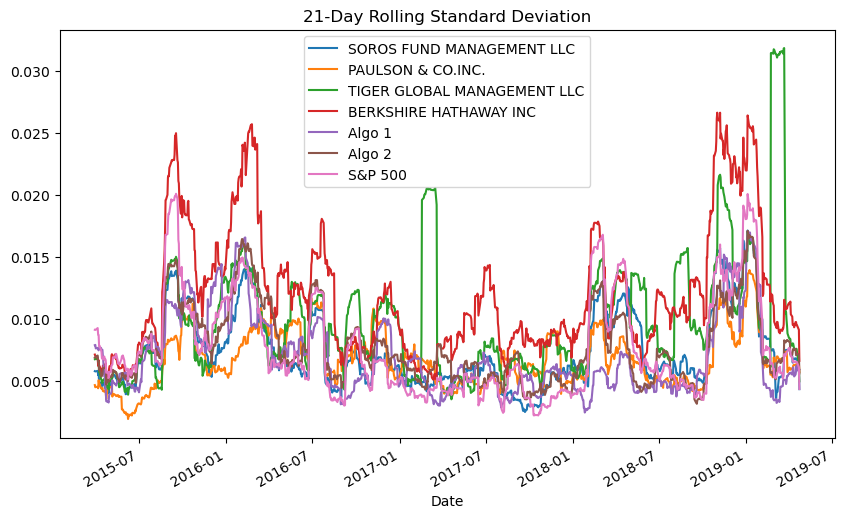

In [79]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(title='21-Day Rolling Standard Deviation', figsize=(10, 6))
plt.show()

### Calculate and plot the correlation

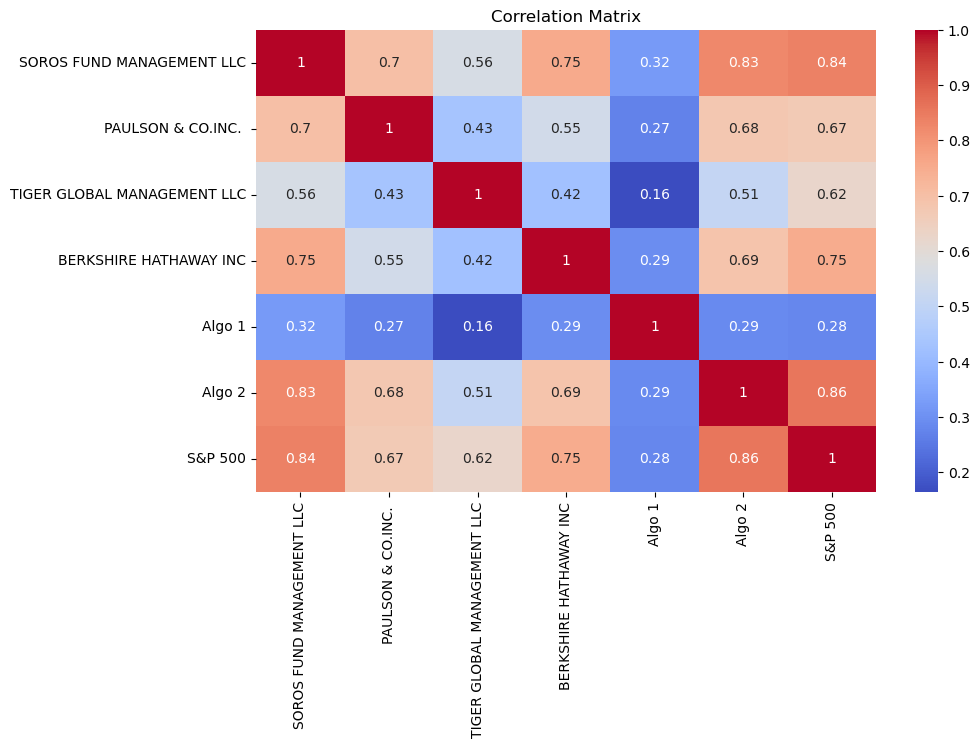

In [80]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

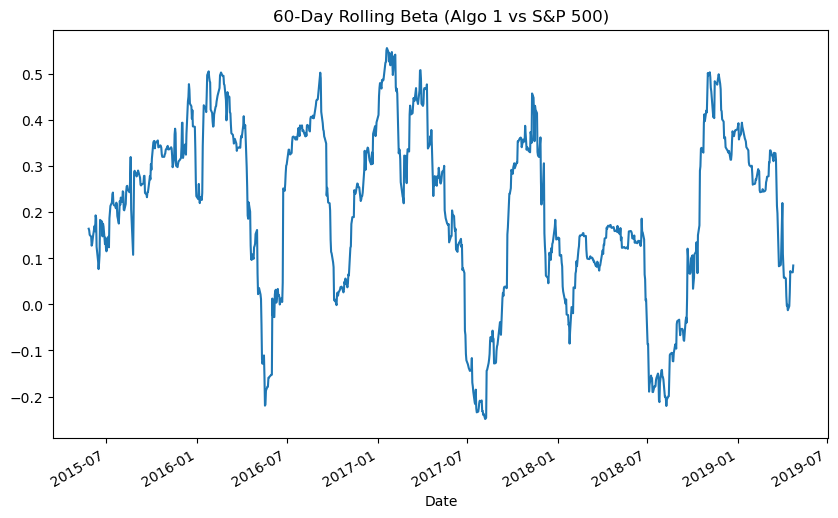

In [81]:
# Calculate covariance of a single portfolio
chosen_portfolio = 'Algo 1'
covariance = combined_df[chosen_portfolio].rolling(window=60).cov(combined_df['S&P 500'])

# Calculate variance of S&P 500
variance = combined_df['S&P 500'].rolling(window=60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(title=f'60-Day Rolling Beta ({chosen_portfolio} vs S&P 500)', figsize=(10, 6))
plt.show()


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

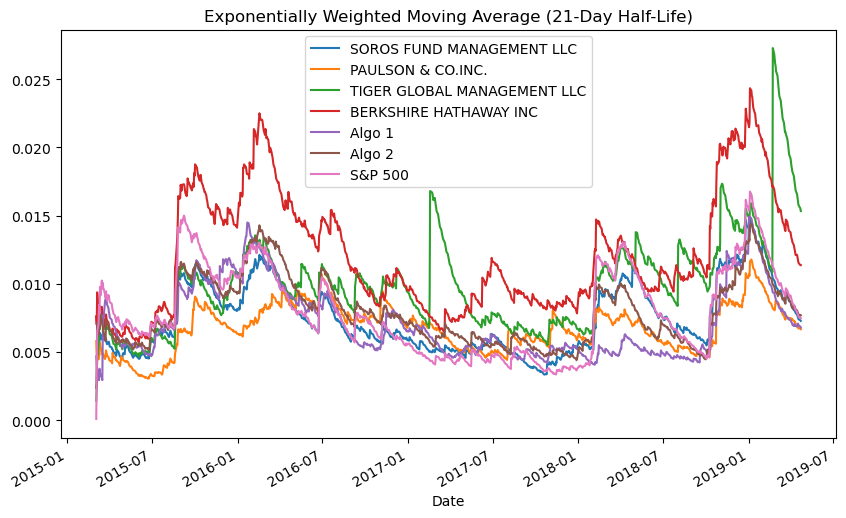

In [82]:
# Use `ewm` to calculate the rolling window
ewm_std = combined_df.ewm(halflife=21).std()
ewm_std.plot(title='Exponentially Weighted Moving Average (21-Day Half-Life)', figsize=(10, 6))
plt.show()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [83]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / annualized_std


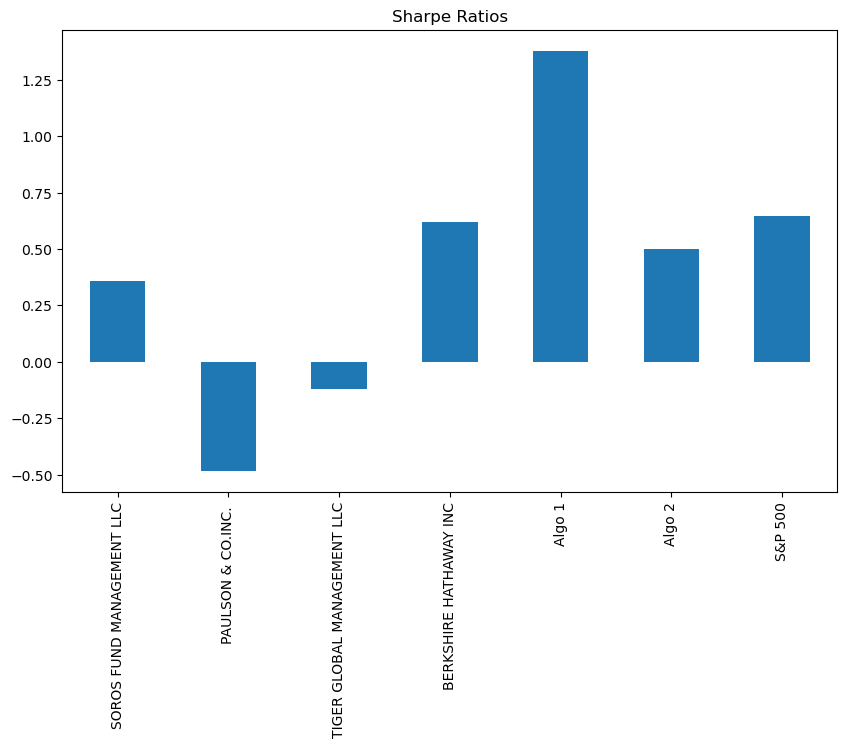

In [84]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios', figsize=(10, 6))
plt.show()


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Only algo 1 outperformed both, Algo 2 did not. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [85]:
# Reading data from 1st stock
aapl_historical = pd.read_csv('aapl_historical.csv', index_col='Trade DATE', parse_dates=True)


In [86]:
# Reading data from 2nd stock
cost_historical = pd.read_csv('cost_historical.csv', index_col='Trade DATE', parse_dates=True)


In [87]:
# Reading data from 3rd stock
goog_historical = pd.read_csv('goog_historical.csv', index_col='Trade DATE', parse_dates=True)


In [88]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.DataFrame({
    'AAPL': aapl_historical['NOCP'],
    'COST': cost_historical['NOCP'],
    'GOOG': goog_historical['NOCP']
})

In [89]:
# Reset Date index
custom_portfolio = custom_portfolio.sort_index()


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [93]:
# Calculate daily returns
custom_portfolio = custom_portfolio.pct_change()
# Drop NAs
custom_portfolio.dropna()
# Display sample data
custom_portfolio

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-15,NaN,NaN,NaN
2018-05-16,-1.700021,1.099033,-0.904711
2018-05-17,-0.172330,-0.919822,1.001843
2018-05-18,-0.746698,1.353968,-2.270438
2018-05-21,5.938149,0.185718,-1.732643
...,...,...,...
2019-05-03,1.569571,-1.581576,6.131612
2019-05-06,-0.229531,-2.607942,-0.840283
2019-05-07,-1.332528,-8.831211,4.818288


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [94]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio['Portfolio'] = custom_portfolio.dot(weights)
# Display sample data
custom_portfolio.head()

,AAPL,COST,GOOG,Portfolio
Trade DATE,,,,
2018-05-15,NaN,NaN,NaN,NaN
2018-05-16,-1.700021,1.099033,-0.904711,-0.501900
2018-05-17,-0.172330,-0.919822,1.001843,-0.030103
2018-05-18,-0.746698,1.353968,-2.270438,-0.554389
2018-05-21,5.938149,0.185718,-1.732643,1.463741


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [103]:
# Join your returns DataFrame to the original returns DataFrame
combined_with_custom = pd.concat([combined_df, custom_portfolio['Portfolio']], axis=1)


In [104]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_with_custom.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Portfolio
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,-0.501900
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.030103
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.554389
2018-05-21,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.007387,1.463741
2018-05-22,-0.002345,0.001168,-0.000240,-0.002455,0.011234,-0.005628,-0.003136,-0.245886
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-1.400454
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-68.568856
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-1.677422
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,-165.615796


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [96]:
# Calculate the annualized `std`
annualized_std_custom = combined_with_custom.std() * np.sqrt(252)


### Calculate and plot rolling `std` with 21-day window

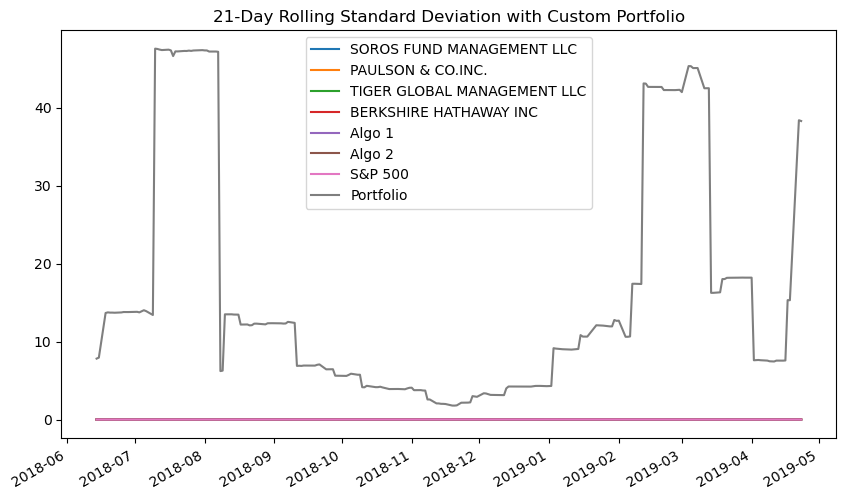

In [97]:
# Calculate rolling standard deviation
rolling_std_custom = combined_with_custom.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std_custom.plot(title='21-Day Rolling Standard Deviation with Custom Portfolio', figsize=(10, 6))
plt.show()

### Calculate and plot the correlation

Correlation Matrix with Custom Portfolio:
                              SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.791960   
PAULSON & CO.INC.                             0.791960            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.478606            0.485318   
BERKSHIRE HATHAWAY INC                        0.817834            0.651225   
Algo 1                                        0.337764            0.361154   
Algo 2                                        0.862921            0.783707   
S&P 500                                       0.877731            0.767017   
Portfolio                                     0.053601            0.080563   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.478606   
PAULSON & CO.INC.                               0.485318   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATH

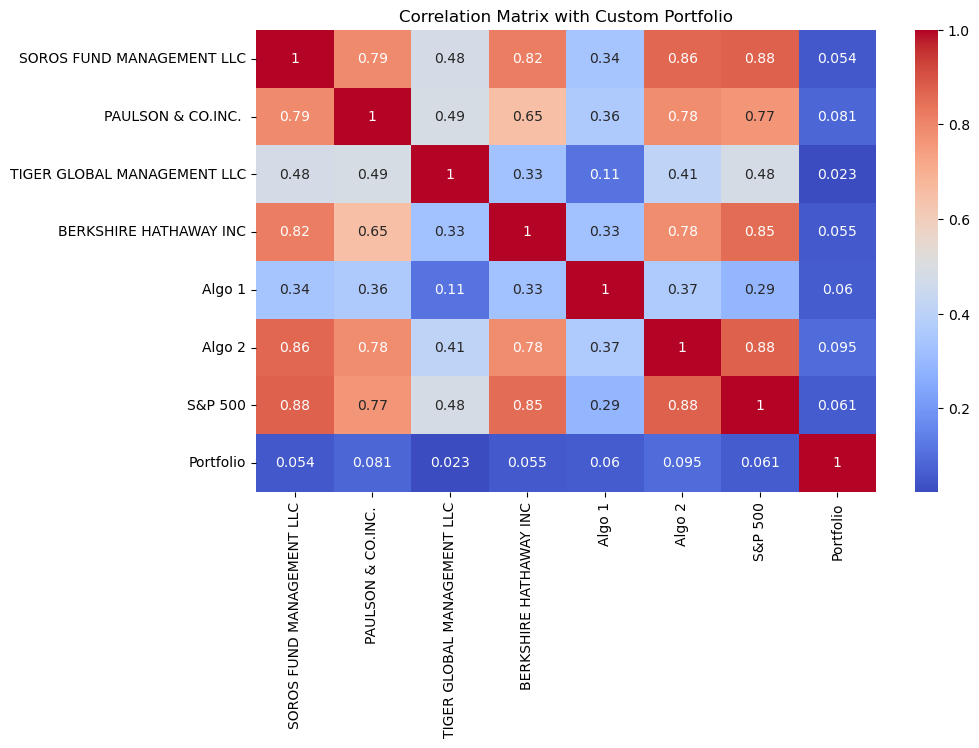

In [99]:
# Calculate and plot the correlation
correlation_custom = combined_with_custom.corr()
print("Correlation Matrix with Custom Portfolio:\n", correlation_custom)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_custom, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Custom Portfolio')
plt.show()


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

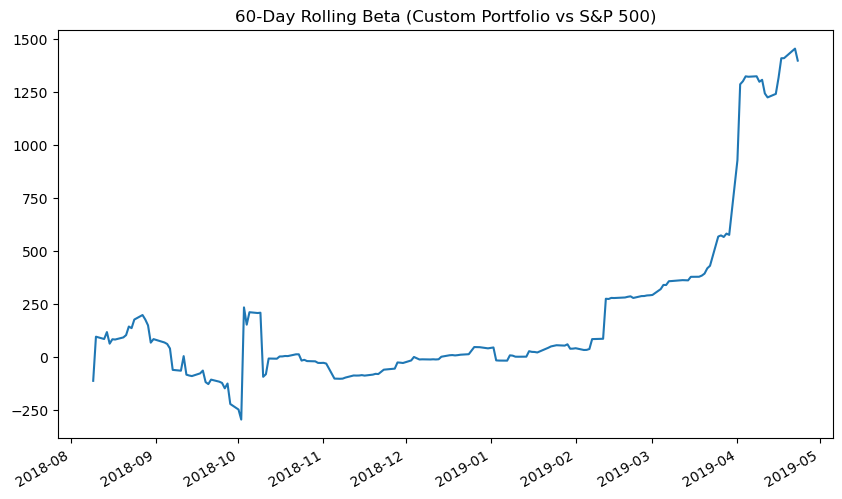

In [100]:
# Calculate and plot Beta
rolling_beta_custom = combined_with_custom['Portfolio'].rolling(window=60).cov(combined_with_custom['S&P 500']) / combined_with_custom['S&P 500'].rolling(window=60).var()
rolling_beta_custom.plot(title='60-Day Rolling Beta (Custom Portfolio vs S&P 500)', figsize=(10, 6))
plt.show()



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [101]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_custom = (combined_with_custom.mean() * 252) / combined_with_custom.std() * np.sqrt(252)


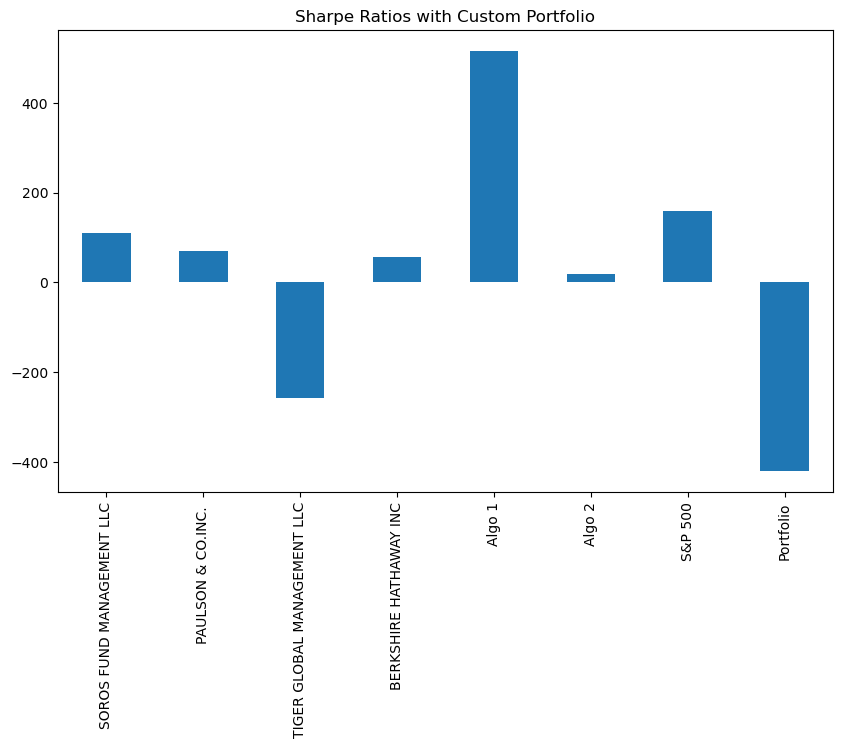

In [102]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_custom.plot(kind='bar', title='Sharpe Ratios with Custom Portfolio', figsize=(10, 6))
plt.show()

### How does your portfolio do?

Write your answer here!

In [ ]:
I picked Algo 1 which performed the best. Highest sharpe ratio, meaning it had the best risk-adjusted return.